In [33]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from matplotlib import colors
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn import tree
import pandas as pd

In [34]:
#import data
data= pd.read_csv("D:\Dokumente\Master-Studium\Semester3\KI_Projekt\egi_benchmark.csv")
data.head()

,Unnamed: 0,Hight,Width,R,G,B,green pixels,green onion pixels,ratio area,Label,Image
0,0,131,97,131,98,59,0,0,0.805619,Kartoffel,Kartoffel_0
1,1,128,111,141,106,61,0,0,0.796523,Kartoffel,Kartoffel_1
2,2,152,116,148,118,75,0,0,0.787971,Kartoffel,Kartoffel_2
3,3,111,108,153,122,76,0,0,0.794086,Kartoffel,Kartoffel_3
4,4,131,114,144,112,68,0,0,0.037900,Kartoffel,Kartoffel_4


In [35]:
data=data.drop(columns="Unnamed: 0")

In [36]:
data.loc[data["Label"]=="Karotte","Label"]=0
data.loc[data["Label"]=="Kartoffel","Label"]=1
data.loc[data["Label"]=="Zwiebel","Label"]=2
data.loc[data["Label"]=="Karotte_Trieb","Label"]=3
data.loc[data["Label"]=="Kartoffel_Trieb","Label"]=4
data.loc[data["Label"]=="Zwiebel_Trieb","Label"]=5

data["Label"]=data["Label"].astype("int")
data

,Hight,Width,R,G,B,green pixels,green onion pixels,ratio area,Label,Image
0,131,97,131,98,59,0,0,0.805619,1,Kartoffel_0
1,128,111,141,106,61,0,0,0.796523,1,Kartoffel_1
2,152,116,148,118,75,0,0,0.787971,1,Kartoffel_2
3,111,108,153,122,76,0,0,0.794086,1,Kartoffel_3
4,131,114,144,112,68,0,0,0.037900,1,Kartoffel_4
...,...,...,...,...,...,...,...,...,...,...
1172,88,65,107,76,40,0,0,0.753234,4,Kartoffel_Trieb_96
1173,106,74,105,71,29,0,0,0.772820,4,Kartoffel_Trieb_97
1174,89,77,100,70,34,0,0,0.749380,4,Kartoffel_Trieb_98
1175,131,91,106,76,43,0,0,0.704010,4,Kartoffel_Trieb_99


In [37]:
X=data.iloc[:,0:8]
X.head()

,Hight,Width,R,G,B,green pixels,green onion pixels,ratio area
0,131,97,131,98,59,0,0,0.805619
1,128,111,141,106,61,0,0,0.796523
2,152,116,148,118,75,0,0,0.787971
3,111,108,153,122,76,0,0,0.794086
4,131,114,144,112,68,0,0,0.037900


In [38]:
y=data.iloc[:,8]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Label, dtype: int32

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
X_train

,Hight,Width,R,G,B,green pixels,green onion pixels,ratio area
715,124,108,91,50,53,143,0,0.772737
43,182,173,152,126,75,0,0,0.006177
461,274,53,74,62,57,3,0,0.667401
535,167,67,111,81,56,0,21,0.411163
380,251,59,154,89,24,0,0,0.785401
...,...,...,...,...,...,...,...,...
1044,226,119,101,87,76,624,718,0.325110
1095,119,98,137,104,67,0,0,0.809981
1130,136,114,134,105,67,0,0,0.802632
860,261,47,141,127,70,506,1940,0.473995


In [41]:
y_train

715     2
43      1
461     0
535     0
380     0
       ..
1044    5
1095    4
1130    4
860     3
1126    4
Name: Label, Length: 941, dtype: int32

In [42]:
clf = RandomForestClassifier(bootstrap=True, random_state=6, n_estimators=33)
#clf = RandomForestClassifier(random_state=None)
clf.fit(X_train,y_train)
print(clf.n_estimators)

33


In [43]:
y_test_pred=clf.predict(X_test)
y_train_pred=clf.predict(X_train)
accuracy_testdata = accuracy_score(y_test, y_test_pred)
accuracy_traindata = accuracy_score(y_train, y_train_pred)
print(f"Accuracy Test: {accuracy_testdata}\nAccuracy Train: {accuracy_traindata}")

Accuracy Test: 0.885593220338983
Accuracy Train: 0.9989373007438895


Text(0.5, 1.0, 'Vegis TEST DATA')

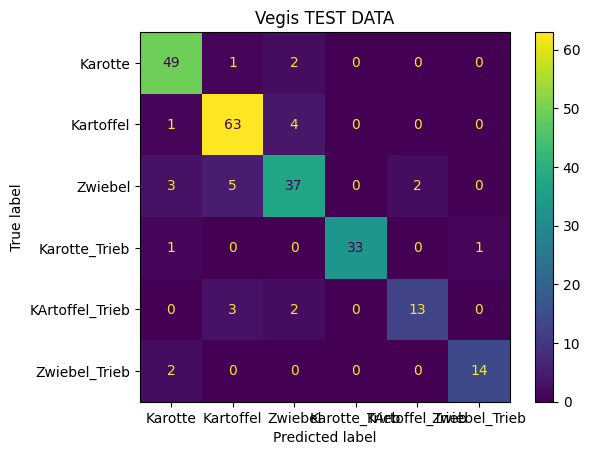

In [44]:
disp = ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    y_test,
    display_labels=['Karotte', 'Kartoffel', 'Zwiebel', 'Karotte_Trieb','KArtoffel_Trieb','Zwiebel_Trieb'],
    cmap='viridis',
    normalize=None,
)
disp.ax_.set_title("Vegis TEST DATA")

Text(0.5, 1.0, 'Vegis TRAIN  DATA')

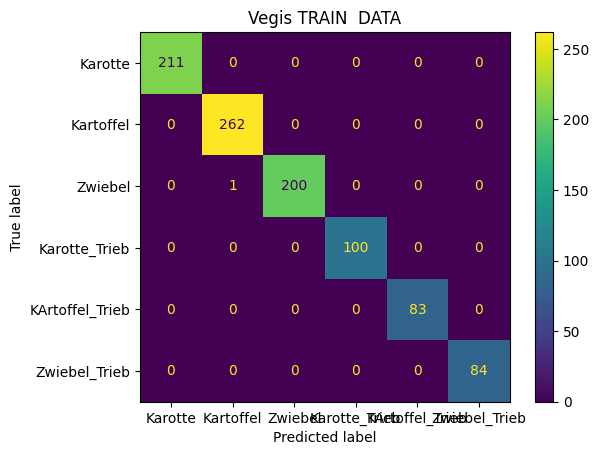

In [45]:
disp = ConfusionMatrixDisplay.from_estimator(
    clf,
    X_train,
    y_train,
    display_labels=['Karotte', 'Kartoffel', 'Zwiebel', 'Karotte_Trieb','KArtoffel_Trieb','Zwiebel_Trieb'],
    cmap='viridis',
    normalize=None,
)
disp.ax_.set_title("Vegis TRAIN  DATA")

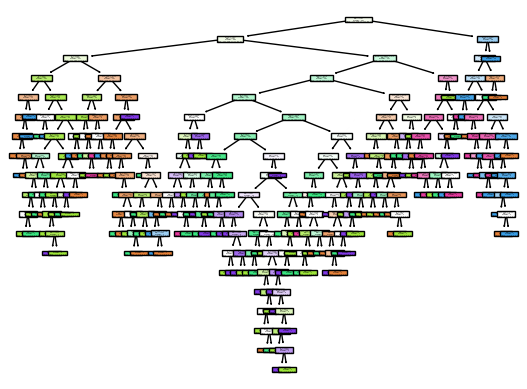

In [46]:
tree.plot_tree(clf.estimators_[0],
               feature_names = X.columns, 
               filled = True);